In [45]:
import psycopg2
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest

In [20]:
engine = create_engine('postgres:///music')
conn = engine.connect()
engine.table_names()

['reviews', 'artists', 'genres', 'labels', 'years', 'content']

In [21]:
query = """
SELECT
    reviews.reviewid,
    reviews.score,
    years.year
FROM reviews
FULL OUTER JOIN years ON years.reviewid = reviews.reviewid
"""
result = conn.execute(query)
df = pd.DataFrame(result.fetchall(), columns=result.keys())
df.head()

,reviewid,score,year
0,22703,9.3,1998.0
1,22721,7.9,2016.0
2,22659,7.3,2016.0
3,22661,9.0,2016.0
4,22725,8.1,2016.0


In [23]:
df = df[df['year'] >= 2000]

In [24]:
#2000-2009 to 2010-2017
range_1 = df[df['year'] >= 2010] #2010-2017
range_2 = df[df['year'] <= 2009] #2000-2009

In [25]:
range_1['year'].unique(), range_2['year'].unique()

(array([2016., 2017., 2011., 2015., 2010., 2012., 2014., 2013.]),
 array([2006., 2003., 2002., 2000., 2009., 2004., 2008., 2005., 2001.,
        2007.]))

In [26]:
range_1['score'].mean(), range_2['score'].mean()

(7.065059501901625, 6.961140475706527)

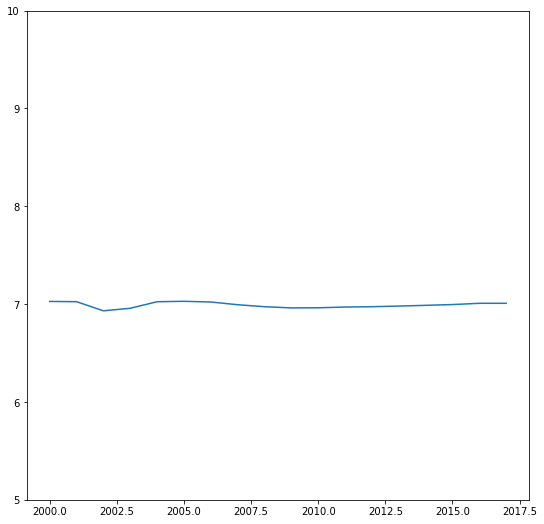

In [36]:
# data is already sorted by pub_date
year_scores = []
years = list(range(2000, 2018))
for year in years:
    year_data = df[df['year'] <= year]
    year_scores.append(year_data['score'].mean())
    
plt.figure(figsize=(9,9))
plt.ylim(5, 10)
plt.plot(years, year_scores);

In [37]:
year_scores

[7.027272727272723,
 7.024906132665834,
 6.931501416430586,
 6.957209302325557,
 7.0242645144493645,
 7.028633577219727,
 7.021530334560635,
 6.993756656017106,
 6.97339164460819,
 6.961140475706527,
 6.962375876833411,
 6.969868779400849,
 6.973533393501808,
 6.979690949227347,
 6.987434420985253,
 6.995388190430745,
 7.008188792528303,
 7.008227249986053]

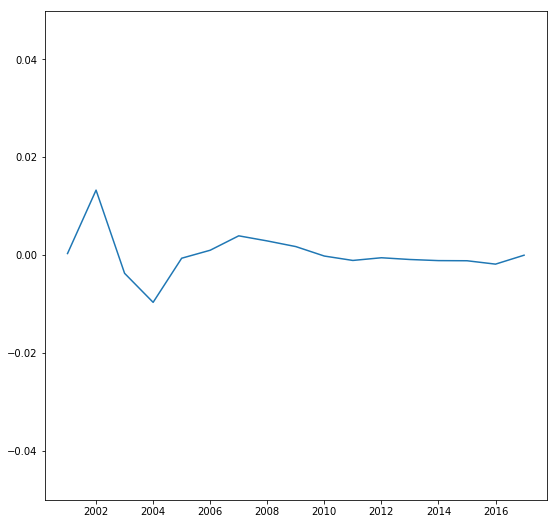

In [34]:
yoy_changes = []
for i in range(len(year_scores) - 1):
    yoy_change = 1 - (year_scores[i+1] / year_scores[i])
    yoy_changes.append(yoy_change)
    
plt.figure(figsize=(9,9))
plt.ylim(-0.05, 0.05)
plt.plot(years[1:], yoy_changes);

In [40]:
range_1['score'].mean(), range_2['score'].mean()

(7.065059501901625, 6.961140475706527)

In [41]:
range_1['score'].std(), range_2['score'].std()

(1.0773284923866777, 1.4230652729780655)

In [43]:
z, p_value = ztest(range_1['score'], range_2['score'])
f'Z-statistic is {z} and p-value is {p_value}.'

'Z-statistic is 5.4287780851588 and p-value is 5.67411827977542e-08.'

In [63]:
x1, x2 = list(range(1, 101)), list(range(102, 101))

In [64]:
z, p_value = ztest(x1, x2)
z, p_value

(0.0, 1.0)